## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

## Code

In [2]:
df = pd.read_excel("bases/dataset_rolling_stones.xlsx")
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [3]:
print("Shape: ",df.shape)
df.info()

Shape:  (1610, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  durat

In [4]:
print("Data Inicial: ", df["release_date"].min())

Data Inicial:  1964-04-16 00:00:00


In [5]:
print("Data Final: ", df["release_date"].max())

Data Final:  2022-06-10 00:00:00


#### Check for null values

In [6]:
df.isnull().sum() # contar quantidade de valores nulos no database

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

#### Check for duplicates

In [7]:
df.duplicated().sum()

6

In [8]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [9]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


#### Tom 5 albuns com maiores médias de música

In [10]:
df["duration_min"] = df["duration_ms"] / 60000
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [11]:
df.groupby("album")["duration_min"].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duration_min, Length: 90, dtype: float64

In [12]:
df_maior_musica = df.groupby("album")["duration_min"].mean().sort_values(ascending=False)
df_maior_musica

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duration_min, Length: 90, dtype: float64

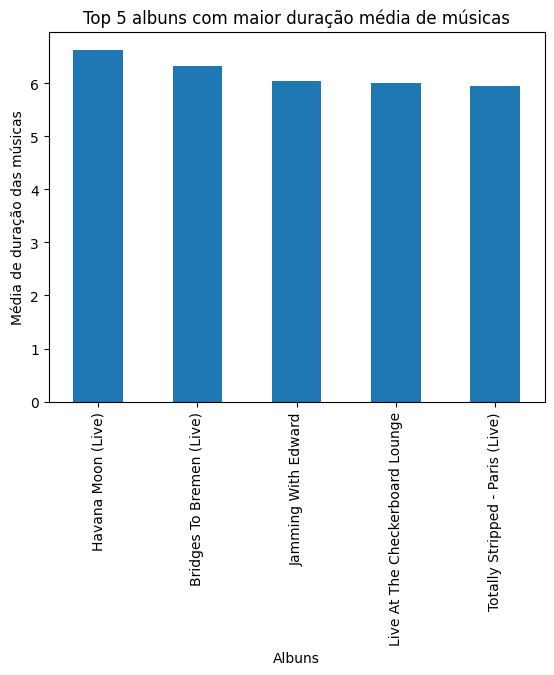

In [13]:
df_maior_musica.head(5).plot(kind="bar")
plt.xlabel("Albuns")
plt.ylabel("Média de duração das músicas")
plt.title("Top 5 albuns com maior duração média de músicas")
plt.show()

In [14]:
top_albuns = df['album'].value_counts().head(10)

In [15]:
top_albuns

album
Voodoo Lounge Uncut (Live)         56
Honk (Deluxe)                      47
Live Licks                         46
Tattoo You (Super Deluxe)          46
Some Girls (Deluxe Version)        44
Goats Head Soup (Deluxe)           37
Flashpoint                         34
Sticky Fingers (Super Deluxe)      33
On Air (Deluxe)                    32
Live At The Checkerboard Lounge    32
Name: count, dtype: int64

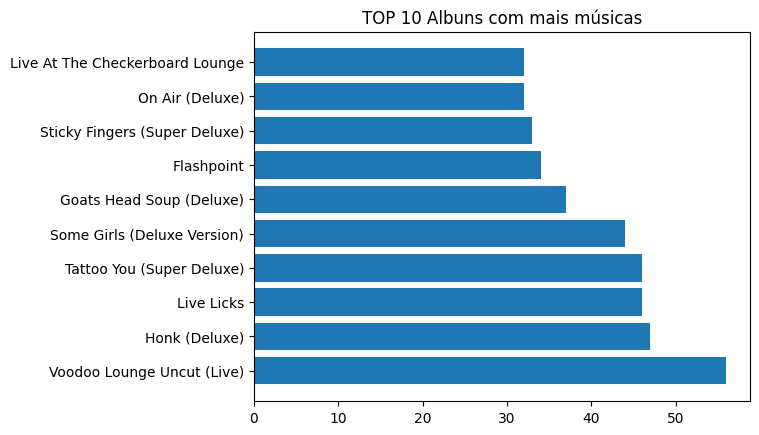

In [16]:
plt.barh(top_albuns.index, top_albuns.values)
plt.title("TOP 10 Albuns com mais músicas")
plt.show()

In [17]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"),pd.to_datetime("2020"))]

In [18]:
df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().sort_values(ascending=False).head(10)

In [19]:
df_por_album

album
Honk (Deluxe)                      1232
Voodoo Lounge Uncut (Live)          654
On Air (Deluxe)                     573
Live At The Checkerboard Lounge     482
Havana Moon (Live)                  445
Bridges To Buenos Aires (Live)      433
Blue & Lonesome                     419
Bridges To Bremen (Live)            396
Some Girls: Live In Texas '78       344
Ladies & Gentlemen (Live)           343
Name: popularity, dtype: int64

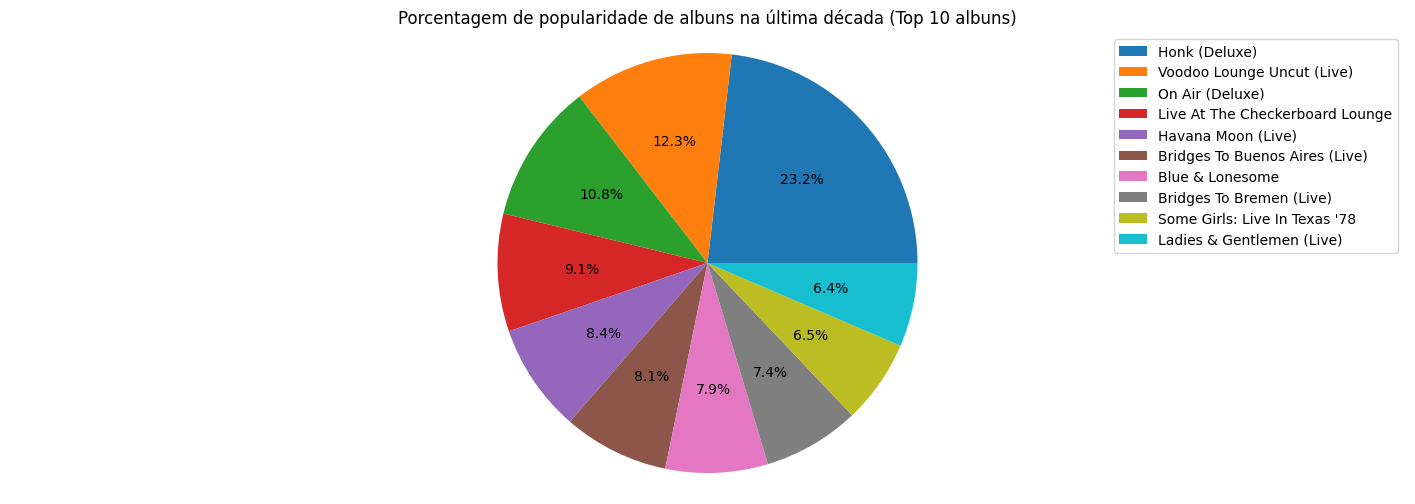

In [20]:
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100

labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("Porcentagem de popularidade de albuns na última década (Top 10 albuns)")
plt.legend(labels,loc="best")
plt.show()

#### Identifying outliers

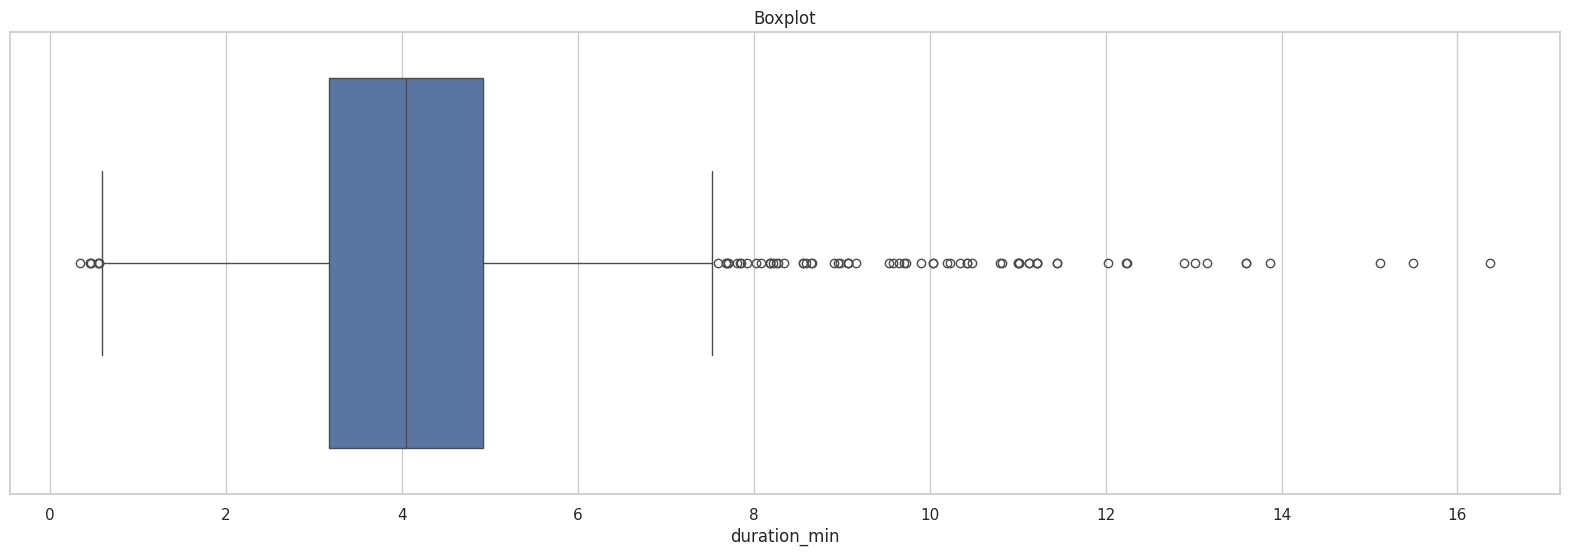

In [21]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(20,6))
sns.boxplot(x="duration_min", data=df)
axes.set_title("Boxplot")
plt.show()

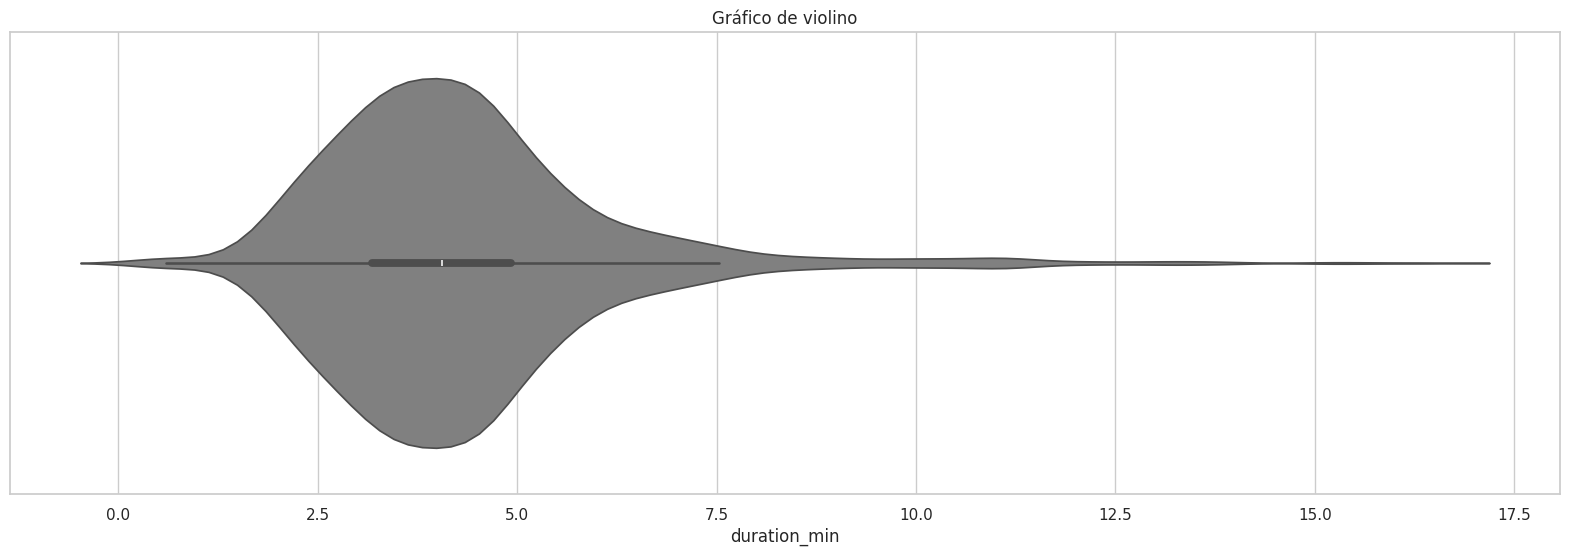

In [22]:
fig, axes = plt.subplots(figsize=(20,6))
sns.violinplot(x="duration_min", data=df, color="gray")
axes.set_title("Gráfico de violino")
plt.show()

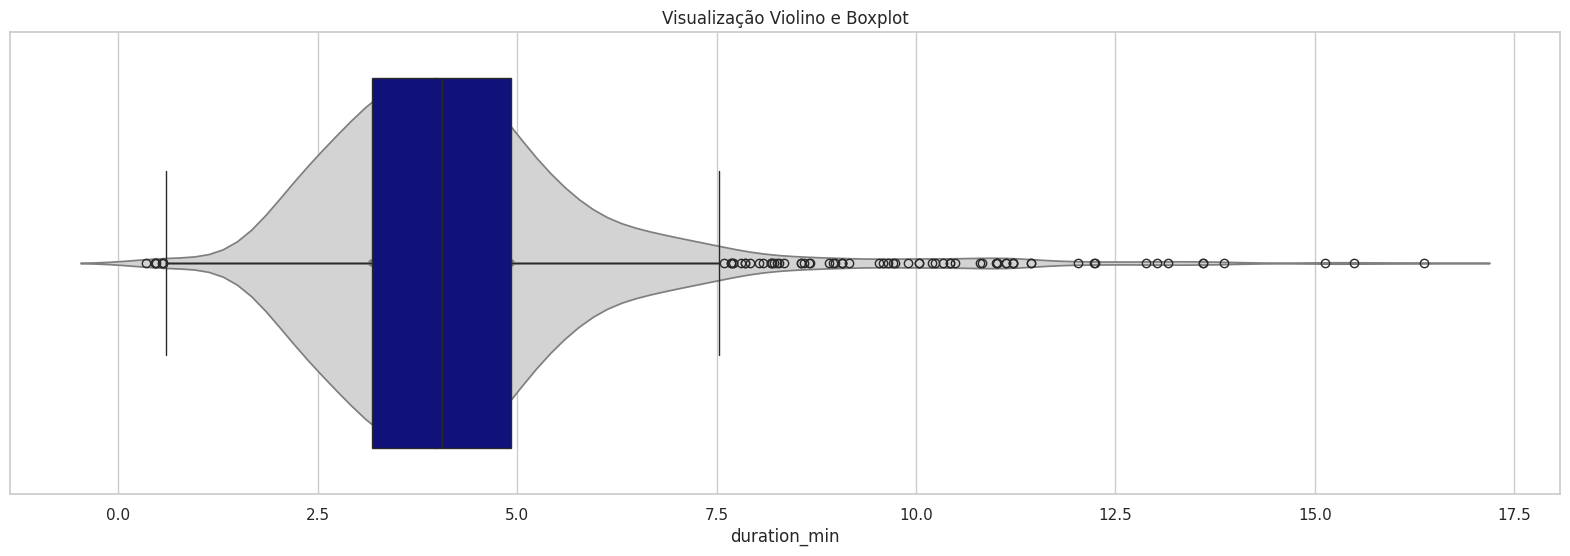

In [23]:
fig, ax = plt.subplots(figsize=(20,6))

sns.violinplot(x="duration_min", data=df, ax=ax, color="lightgray")
sns.boxplot(x="duration_min", data=df, ax=ax, whis=1.5, color="darkblue")

ax.set_title("Visualização Violino e Boxplot")
plt.show()

In [24]:
def classifica_musica_aovivo(df):
    if df["liveness"] >= 0.8:
        return True
    else:
        return False

In [25]:
df["ao_vivo"] = df.apply(classifica_musica_aovivo, axis=1)

In [26]:
df

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False


In [27]:
df.groupby("ao_vivo")["ao_vivo"].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [28]:
df_gravado_studio = df[df["ao_vivo"] == False]
df_ao_vivo = df[df["ao_vivo"] == True]

In [29]:
df_gravado_studio.head(3)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.1250,0.741,-5539.0,0.0915,101628.0,0.125,31,244293,4.071550,False
23,Honky Tonk Women - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,1,0.1620,0.430,0.901,0.0110,0.694,-6215.0,0.0450,112077.0,0.890,32,216546,3.609100,False
25,Hand Of Fate - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,3,0.0654,0.477,0.899,0.0376,0.727,-6189.0,0.0425,129991.0,0.805,29,267866,4.464433,False


In [30]:
print("Média das músicas ao vivo: ", df_ao_vivo["duration_min"].mean())

Média das músicas ao vivo:  5.088648962516734


In [31]:
print("Média das músicas em studio: ", df_gravado_studio["duration_min"].mean())

Média das músicas em studio:  3.940451363908873


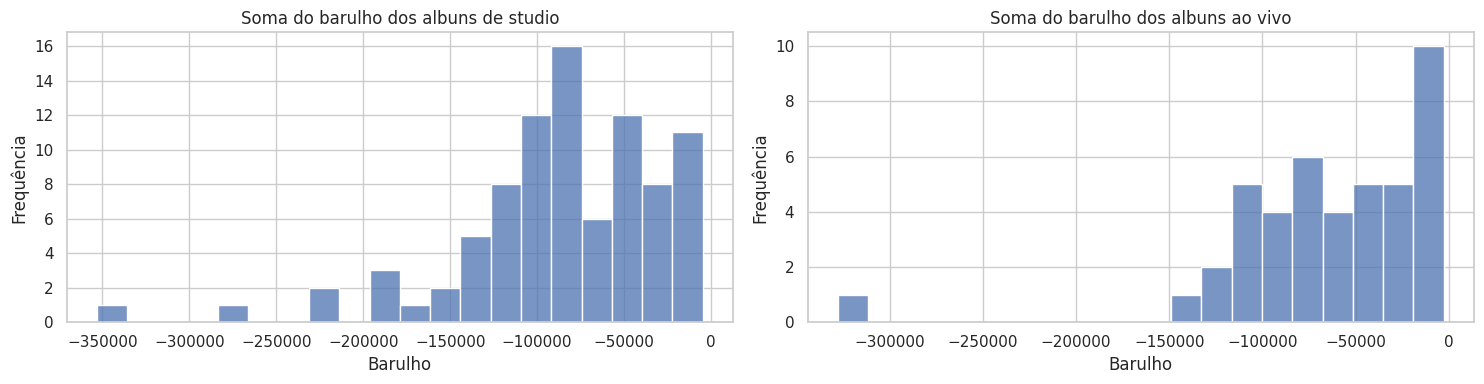

In [32]:
df_studio = df_gravado_studio.groupby("album")["loudness"].sum()
df_aovivo = df_ao_vivo.groupby("album")["loudness"].sum()

fig, ax = plt.subplots(1, 2, figsize=(15,4))

sns.histplot(data=df_studio, bins=20, ax=ax[0])
ax[0].set_title("Soma do barulho dos albuns de studio")
ax[0].set_xlabel("Barulho")
ax[0].set_ylabel("Frequência")

sns.histplot(data=df_aovivo, bins=20, ax=ax[1])
ax[1].set_title("Soma do barulho dos albuns ao vivo")
ax[1].set_xlabel("Barulho")
ax[1].set_ylabel("Frequência")

fig.tight_layout()
plt.show()

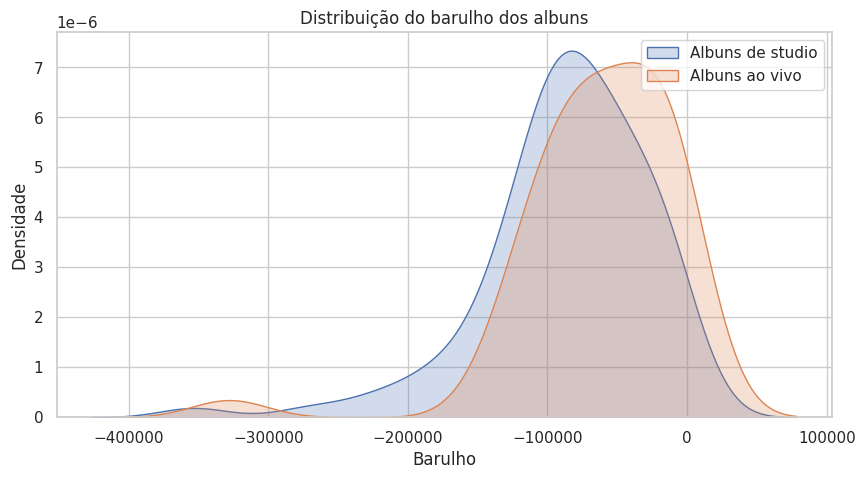

In [34]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_studio, label="Albuns de studio", fill=True)
sns.kdeplot(data=df_aovivo, label="Albuns ao vivo", fill=True)

plt.title("Distribuição do barulho dos albuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()
plt.show()

## Statistics

#### Shapiro

In [35]:
stat, p = shapiro(df_studio)
print("Soma do barulho dos albuns de studio: ")
print("Estatística de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

Soma do barulho dos albuns de studio: 
Estatística de teste: 0.8958, valor p: 3.2961095257633133e-06
A hipótese de normalidade é rejeitada


In [36]:
stat, p = shapiro(df_aovivo)
print("Soma do barulho dos albuns ao vivo: ")
print("Estatística de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

Soma do barulho dos albuns ao vivo: 
Estatística de teste: 0.7913, valor p: 2.35057973441144e-06
A hipótese de normalidade é rejeitada


In [37]:
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_aovivo.sample(len(df_aovivo)), alternative="less")
print("Estatística de teste U: ", stat)
print("Valor p: ", p)

alpha = 0.05
if p < alpha:
    print("Diferença estatisticamente significante")
else:
    print("Não há diferença estatisticamente significante")

Estatística de teste U:  1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significante


## Correlation

In [38]:
media_por_album = df.groupby("album")["valence"].mean().reset_index()

media_por_album = media_por_album.rename(columns={"valence": "media_valence"})

media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]]

media_por_album.groupby("sentimento")["sentimento"].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [39]:
media_por_album.head(2)

,album,media_valence,sentimento
0,12 X 5,0.704000,positivo
1,12 x 5,0.689917,positivo


In [40]:
df_resultado_final = pd.merge(df, media_por_album, on="album")
df_resultado_final.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo


In [46]:
df_numericos = df_resultado_final.select_dtypes(include=['number'])

matriz_correlacao = df_numericos.corr()
# matriz_correlacao

correlacao_sentimento = matriz_correlacao["media_valence"]

display(correlacao_sentimento)

track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duration_min       -0.309499
media_valence       1.000000
Name: media_valence, dtype: float64

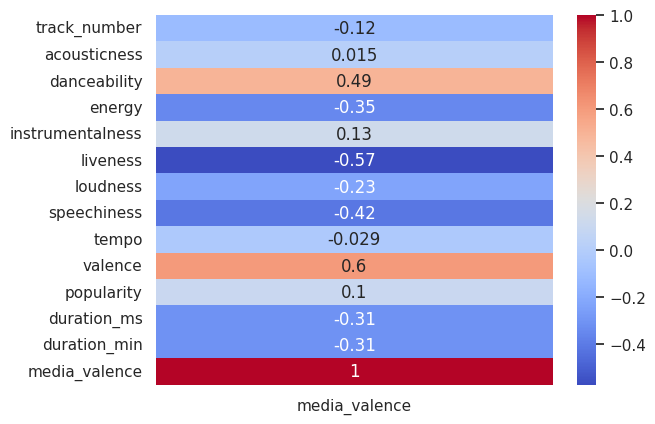

In [48]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap="coolwarm")
plt.show()

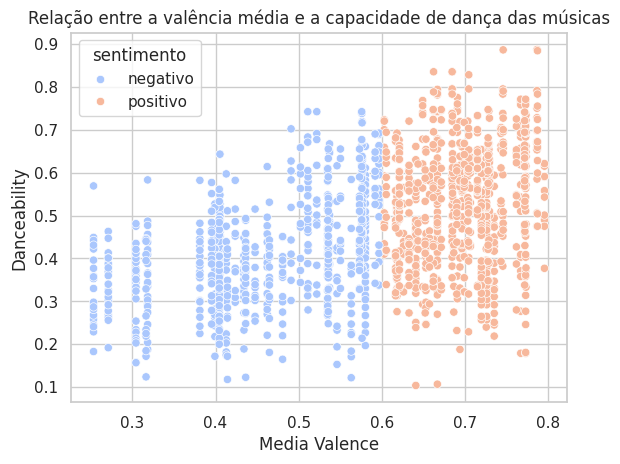

In [49]:
sns.scatterplot(x="media_valence", y="danceability", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("Media Valence")
plt.ylabel("Danceability")
plt.title("Relação entre a valência média e a capacidade de dança das músicas")
plt.show()

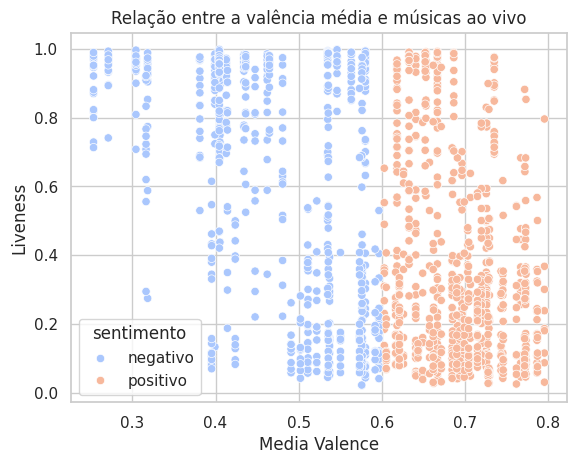

In [51]:
sns.scatterplot(x="media_valence", y="liveness", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("Media Valence")
plt.ylabel("Liveness")
plt.title("Relação entre a valência média e músicas ao vivo")
plt.show()